In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
dati_marziani = {"tipo": [], "colore": [], "n_arti": [], "peso": [], "altezza": [], "larghezza": []}
dati_marziani

{'tipo': [],
 'colore': [],
 'n_arti': [],
 'peso': [],
 'altezza': [],
 'larghezza': []}

In [27]:
file = open("./marziani.csv", "r")
for riga in file.readlines():
    dati_linea = riga[:-1].split(",")
    if not((" " in dati_linea) or ("" in dati_linea) or ("specie" in dati_linea)):
        dati_marziani["tipo"].append(dati_linea[0])
        dati_marziani["colore"].append(dati_linea[1])        
        dati_marziani["n_arti"].append(float(dati_linea[2]))        
        dati_marziani["peso"].append(float(dati_linea[3]))        
        dati_marziani["altezza"].append(float(dati_linea[4]))   
        dati_marziani["larghezza"].append(float(dati_linea[5]))
file.close()

In [28]:
for chiave in dati_marziani:
    dati_marziani[chiave] = np.array(dati_marziani[chiave])
dati_marziani

{'tipo': array(['Robby', 'Robby', 'Robby', ..., 'Simmy', 'Simmy', 'Simmy'],
       dtype='<U5'),
 'colore': array(['viola', 'viola', 'viola', ..., 'viola', 'rosso', 'viola'],
       dtype='<U5'),
 'n_arti': array([20., 27., 25., ..., 22., 27., 23.]),
 'peso': array([3.87, 3.15, 4.35, ..., 4.55, 4.53, 5.1 ]),
 'altezza': array([14.77, 28.19, 12.05, ..., 29.41, 33.12, 18.88]),
 'larghezza': array([73.22, 88.44, 76.74, ..., 68.38, 68.1 , 64.9 ])}

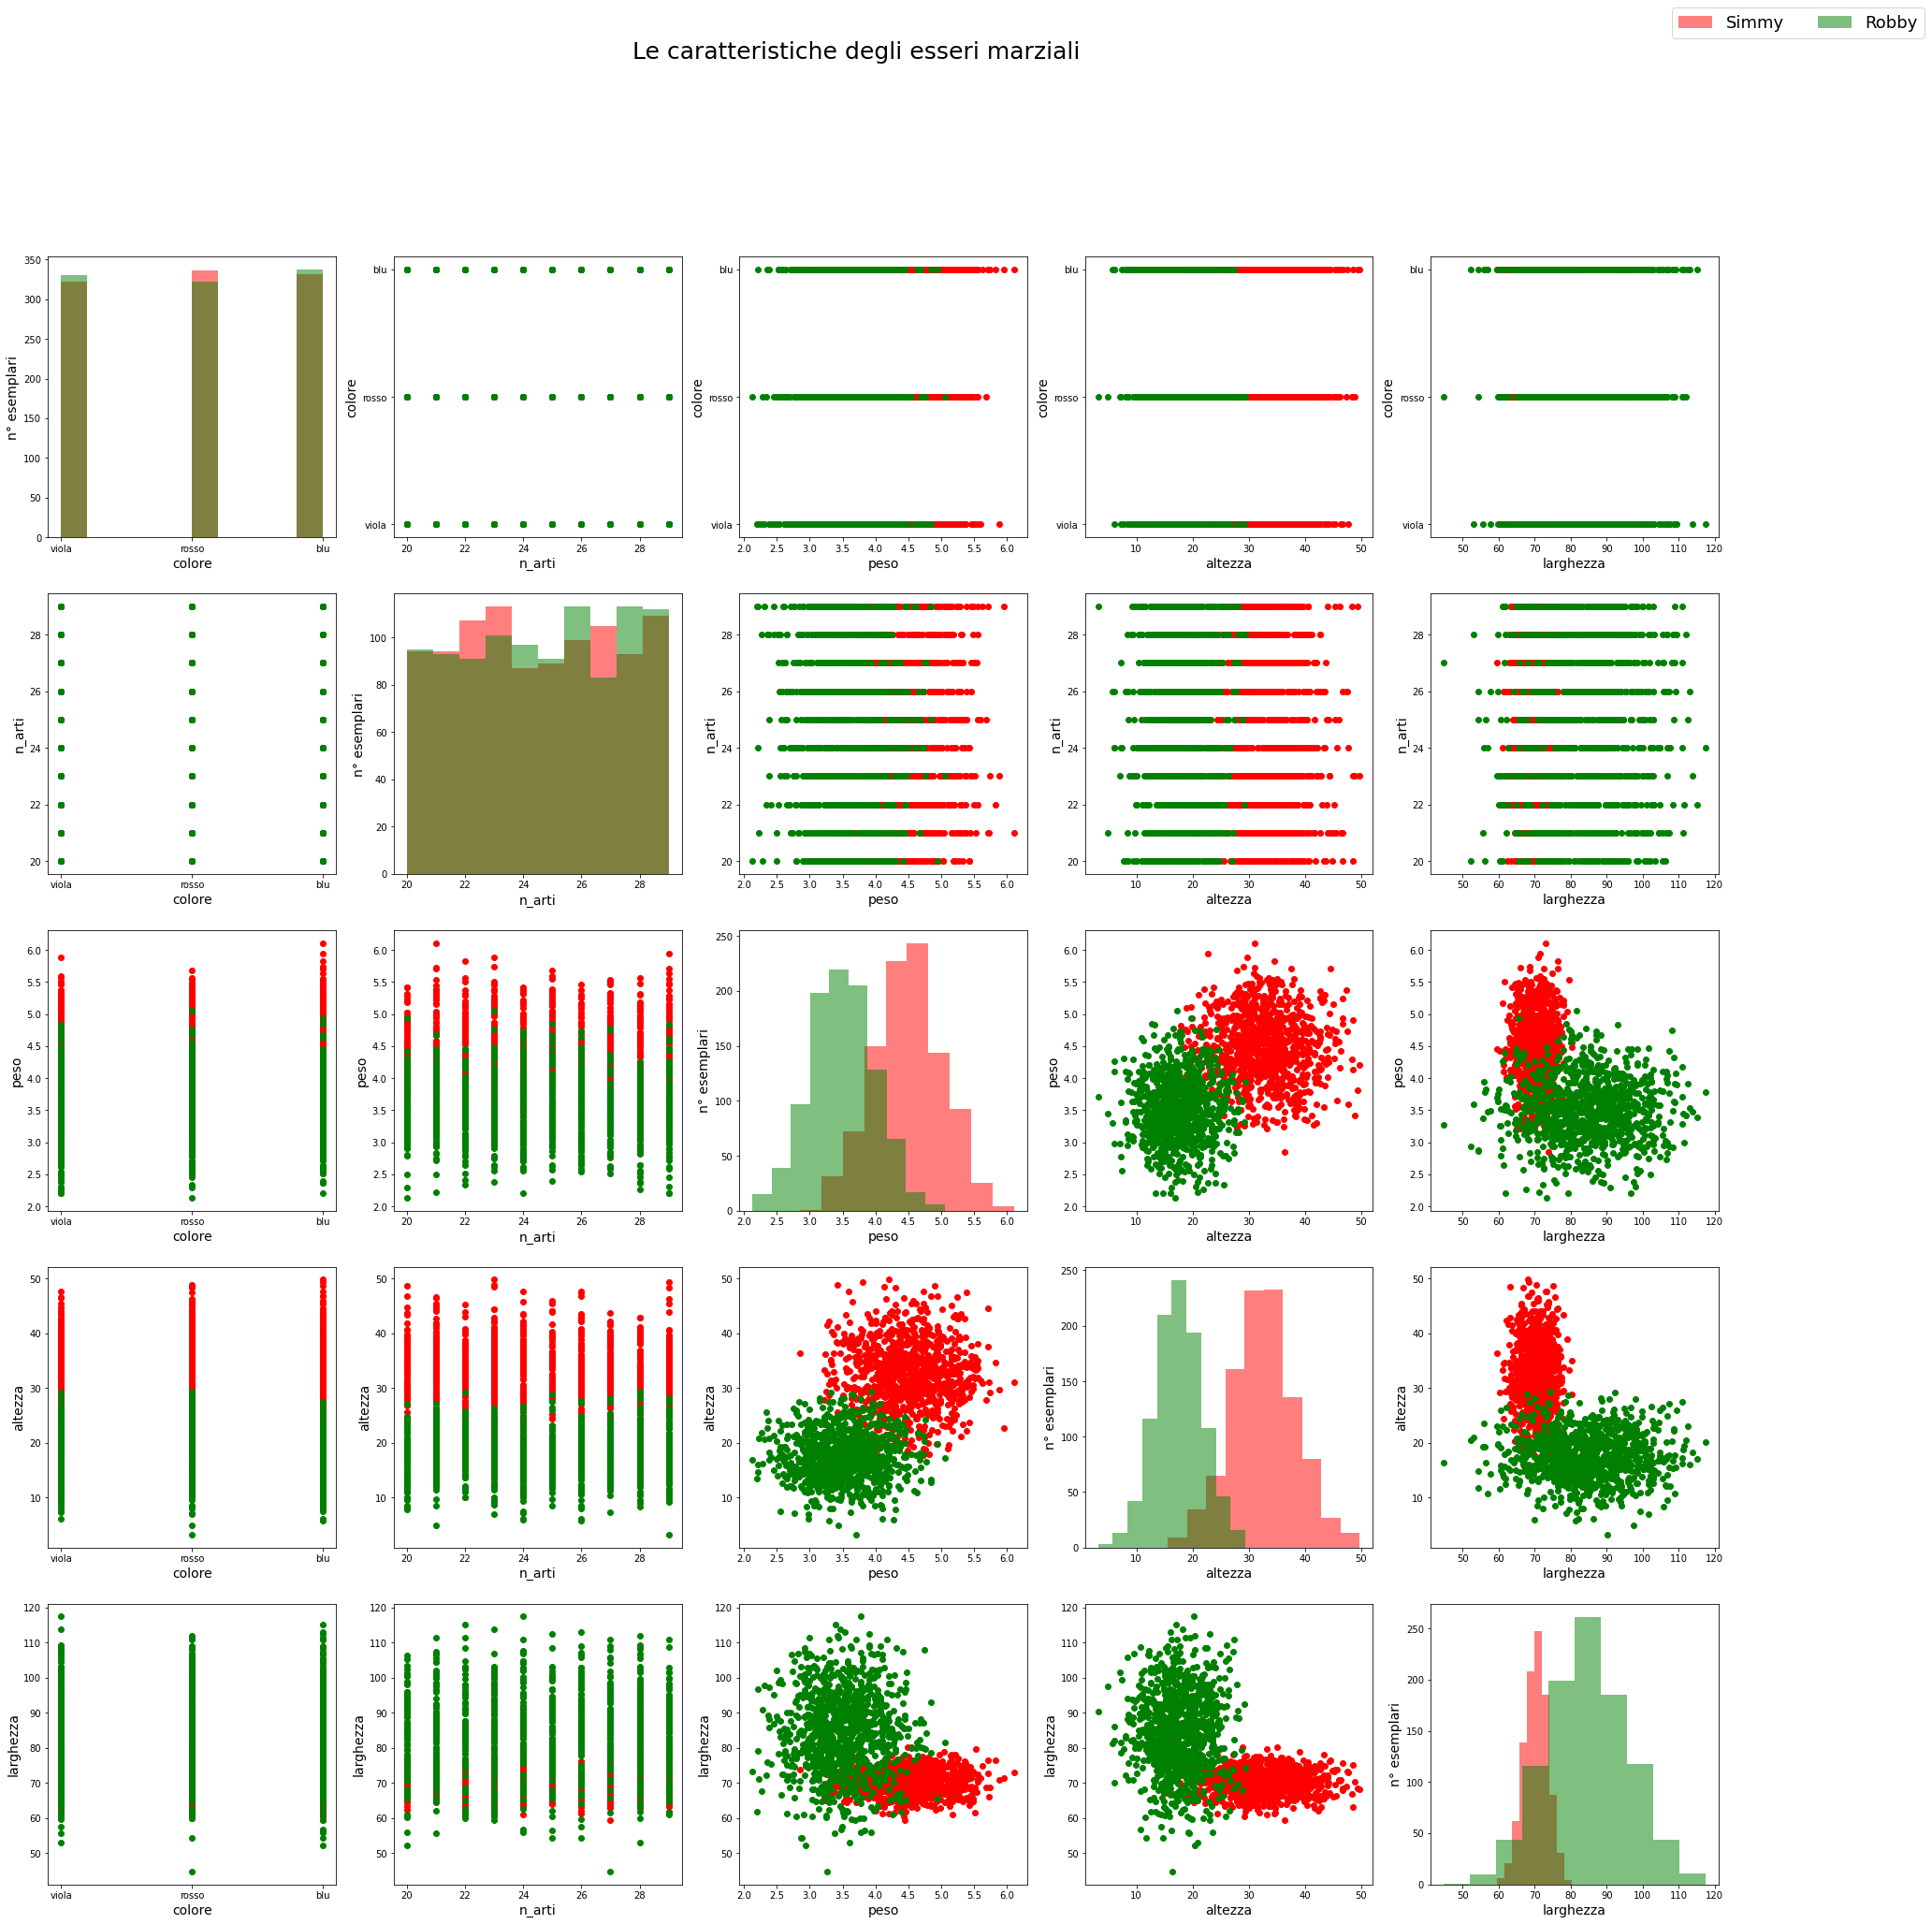

In [33]:
caratteristiche = ["colore", "n_arti", "peso", "altezza", "larghezza"]
n = len(caratteristiche)

fig, axs = plt.subplots(n, n, figsize = (32,32))
for j, dato_y in enumerate(caratteristiche):
    for i, dato_x in enumerate(caratteristiche):
        maschera_simmy = dati_marziani["tipo"] == "Simmy"
        maschera_robby = dati_marziani["tipo"] == "Robby"
        
        if i != j:
            axs[j,i].scatter(dati_marziani[dato_x][maschera_simmy], dati_marziani[dato_y][maschera_simmy], c = "r", label = "Simmy")
            axs[j,i].scatter(dati_marziani[dato_x][maschera_robby], dati_marziani[dato_y][maschera_robby], c = "g", label = "Robby")
            axs[j,i].set_xlabel(dato_x, fontsize = 14)
            axs[j,i].set_ylabel(dato_y, fontsize = 14)
        else:
            axs[j,i].hist(dati_marziani[dato_x][maschera_simmy], bins = 10, color = "r", label = "Simmy", alpha = 0.5)
            axs[j,i].hist(dati_marziani[dato_x][maschera_robby], bins = 10, color = "g", label = "Robby", alpha = 0.5)
            axs[j,i].set_xlabel(dato_x, fontsize = 14)
            axs[j,i].set_ylabel("n° esemplari", fontsize = 14)
fig.suptitle("Le caratteristiche degli esseri marziali", fontsize = 25)
fig.legend(labels = ["Simmy", "Robby"], ncol = 2, fontsize = 18)
plt.show()